<a href="https://colab.research.google.com/github/TranToQuePhuong/AI_Lab08/blob/master/2_Lab_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Multilayer Perceptron trong Python

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import numpy as np
from sklearn.neural_network import MLPClassifier

## 1) MLPClassifier for toy dataset 

### Chuẩn bị dữ liệu

In [2]:
# Create artificial dataset (classification problem within 2 classes within R^2 input space)
X, y = make_moons(n_samples=900, noise=0.2, random_state=0)

In [3]:
X = np.array(X)
y = np.array(y)

In [4]:
X.shape

(900, 2)

In [5]:
y.shape

(900,)

In [6]:
# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7)

In [7]:
# Encode class labels as binary vector (with exactly ONE bit set to 1, and all others to 0)
Y_train_OneHot = np.eye(2)[y_train]
Y_test_OneHot = np.eye(2)[y_test]

In [8]:
X_train.shape

(270, 2)

In [9]:
y_train.shape

(270,)

In [10]:
# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

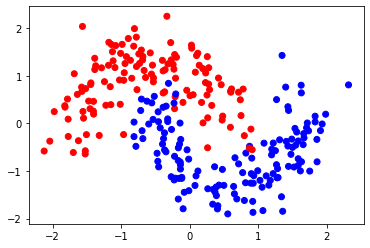

In [11]:
# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)

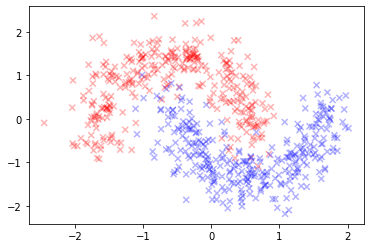

In [12]:
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)


### Xây dựng model `MLPClassifier`

In [13]:


clf = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.2, verbose=True,
              warm_start=False)


In [14]:

# Train the MLP classifier on training dataset
clf.fit(X_train, Y_train_OneHot)
print()


Iteration 1, loss = 1.66502746
Iteration 2, loss = 1.50299776
Iteration 3, loss = 1.43220147
Iteration 4, loss = 1.39701121
Iteration 5, loss = 1.37452910
Iteration 6, loss = 1.34389737
Iteration 7, loss = 1.29116652
Iteration 8, loss = 1.20149743
Iteration 9, loss = 1.07500202
Iteration 10, loss = 0.94137757
Iteration 11, loss = 0.83643723
Iteration 12, loss = 0.76374348
Iteration 13, loss = 0.71733949
Iteration 14, loss = 0.68723098
Iteration 15, loss = 0.66882489
Iteration 16, loss = 0.65484945
Iteration 17, loss = 0.64510853
Iteration 18, loss = 0.63891939
Iteration 19, loss = 0.63189985
Iteration 20, loss = 0.62905077
Iteration 21, loss = 0.62415889
Iteration 22, loss = 0.62067253
Iteration 23, loss = 0.61917658
Iteration 24, loss = 0.61719395
Iteration 25, loss = 0.61580669
Iteration 26, loss = 0.61342012
Iteration 27, loss = 0.61049874
Iteration 28, loss = 0.61140214
Iteration 29, loss = 0.60913416
Iteration 30, loss = 0.60437874
Iteration 31, loss = 0.60662165
Iteration 32, los

In [15]:

# Evaluate acuracy on test data
score = clf.score(X_test,Y_test_OneHot)
print("Acuracy (on test set) = ", score)

Acuracy (on test set) =  0.8523809523809524


### Sử dụng GridSearchCV để chọn bộ thông số tốt nhất 

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# param_grid = [
#   {'hidden_layer_sizes': [(5,), (10,), (15,), (25,)], 
#    'learning_rate_init':[0.003, 0.01, 0.03, 0.1],
#    'alpha': [0.00001, 0.0001, 0.001, 0.01]}
#  ]

param_grid = [
  {'hidden_layer_sizes': [(5,), (10,)], 
   'learning_rate_init':[0.003, 0.01],
   'alpha': [0.00001, 0.0001]}
 ]


clf = GridSearchCV( MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
   beta_2=0.999, early_stopping=False, epsilon=1e-08,
   hidden_layer_sizes=(10,), learning_rate='constant',
   learning_rate_init=0.005, max_iter=500, momentum=0.8,
   nesterovs_momentum=True, power_t=0.5, random_state=11, shuffle=True,
   solver='adam', tol=1e-05, validation_fraction=0.3, verbose=False,
   warm_start=False), 
   param_grid, cv=3, scoring='accuracy')



In [17]:
clf.fit(X_train, Y_train_OneHot)
print("Best parameters set found on development set:")



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters set found on development set:


In [18]:
print(clf.best_params_)


{'alpha': 1e-05, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.003}


In [19]:
clf.best_estimator_

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10,), learning_rate='constant',
              learning_rate_init=0.003, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='adam',
              tol=1e-05, validation_fraction=0.3, verbose=False,
              warm_start=False)

In [20]:
clf.best_score_

0.9407407407407407

## 2) MLPClassifier cho bộ dữ liệu số

Number_of-examples =  1797

 Plot of first example
CLOSE PLOT WINDOW TO CONTINUE


<Figure size 432x288 with 0 Axes>

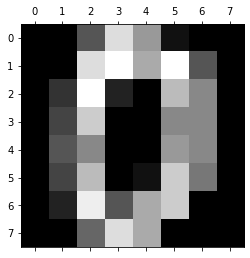

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

digits = load_digits()
n_samples = len(digits.images)
print("Number_of-examples = ", n_samples)

import matplotlib.pyplot as plt
print("\n Plot of first example")
plt.gray() 
plt.matshow(digits.images[0]) 
print("CLOSE PLOT WINDOW TO CONTINUE")
plt.ioff()

In [22]:

# Flatten the images, to turn data in a (samples, feature) matrix:
data = digits.images.reshape((n_samples, -1))

X = data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape

(1437, 64)

In [24]:
y_train.shape

(1437,)

In [25]:
clf = MLPClassifier(hidden_layer_sizes=(30, ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [26]:
clf

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [27]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)


Iteration 1, loss = 1.23478038
Validation score: 0.798611
Iteration 2, loss = 0.66581426
Validation score: 0.715278
Iteration 3, loss = 0.48259294
Validation score: 0.756944
Iteration 4, loss = 0.55959375
Validation score: 0.687500
Iteration 5, loss = 0.59231452
Validation score: 0.694444
Iteration 6, loss = 0.59107448
Validation score: 0.506944
Iteration 7, loss = 0.53785463
Validation score: 0.743056
Iteration 8, loss = 0.57120195
Validation score: 0.645833
Iteration 9, loss = 0.52218112
Validation score: 0.833333
Iteration 10, loss = 0.42856812
Validation score: 0.708333
Iteration 11, loss = 0.45935009
Validation score: 0.819444
Iteration 12, loss = 0.38437933
Validation score: 0.819444
Iteration 13, loss = 0.45910756
Validation score: 0.777778
Iteration 14, loss = 0.45404439
Validation score: 0.736111
Iteration 15, loss = 0.54326317
Validation score: 0.708333
Iteration 16, loss = 0.37908451
Validation score: 0.881944
Iteration 17, loss = 0.26770198
Validation score: 0.847222
Iterat

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30,), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [28]:

score = clf.score(X_train,y_train)
print("Acuracy (on train set) = ", score)

Acuracy (on train set) =  0.9324982602644398


In [29]:

score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)


Acuracy (on test set) =  0.9111111111111111


### Thay đổi số layers, số neurons trên mỗi layers:

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(30, 20, 15 ), activation='tanh', solver='sgd', 
                    alpha=0.00001, batch_size=4, learning_rate='constant', learning_rate_init=0.01, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=True, validation_fraction=0.1, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [31]:
# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)


Iteration 1, loss = 1.34998927
Validation score: 0.736111
Iteration 2, loss = 0.97939220
Validation score: 0.625000
Iteration 3, loss = 1.33434595
Validation score: 0.500000
Iteration 4, loss = 1.23156798
Validation score: 0.729167
Iteration 5, loss = 1.12498011
Validation score: 0.659722
Iteration 6, loss = 1.10861617
Validation score: 0.652778
Iteration 7, loss = 0.84737059
Validation score: 0.743056
Iteration 8, loss = 0.86306266
Validation score: 0.784722
Iteration 9, loss = 0.71913138
Validation score: 0.750000
Iteration 10, loss = 0.65894590
Validation score: 0.826389
Iteration 11, loss = 0.69628824
Validation score: 0.756944
Iteration 12, loss = 0.98747083
Validation score: 0.631944
Iteration 13, loss = 1.00869301
Validation score: 0.611111
Iteration 14, loss = 1.09808260
Validation score: 0.604167
Iteration 15, loss = 0.97099868
Validation score: 0.618056
Iteration 16, loss = 1.14213807
Validation score: 0.763889
Iteration 17, loss = 0.85624564
Validation score: 0.826389
Iterat

MLPClassifier(activation='tanh', alpha=1e-05, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(30, 20, 15), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.1, verbose=True,
              warm_start=False)

In [32]:

score = clf.score(X_train,y_train)
print("Acuracy (on train set) = ", score)

Acuracy (on train set) =  0.8058455114822547


In [33]:

score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)


Acuracy (on test set) =  0.7777777777777778


- Nhận xét: việc chọn số Layers và số neurons trên mỗi Layers phải dựa vào từng bài toán  để có thể đạt được độ chính xác cao nhất